In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
fetal = pd.read_csv("fetal_health.csv")
fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
fetal.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [5]:
fetal.info

<bound method DataFrame.info of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerat

In [6]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
fetal.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [8]:
import seaborn as sns

<Axes: ylabel='Count'>

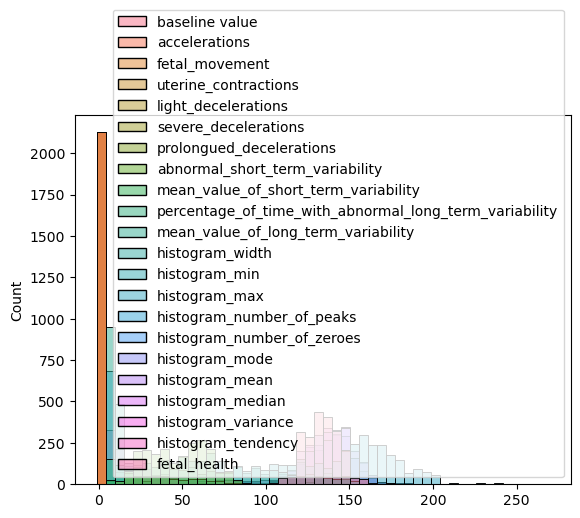

In [9]:
sns.histplot(fetal, bins = 50)


In [10]:
fetal.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

<Axes: xlabel='fetal_health', ylabel='Count'>

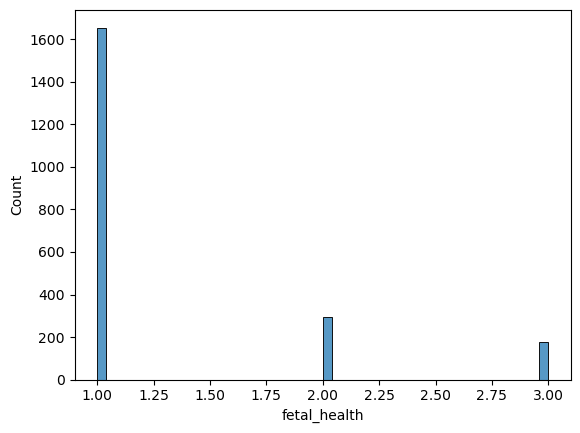

In [11]:
sns.histplot(fetal["fetal_health"], bins = 50)

<Axes: xlabel='fetal_health', ylabel='Count'>

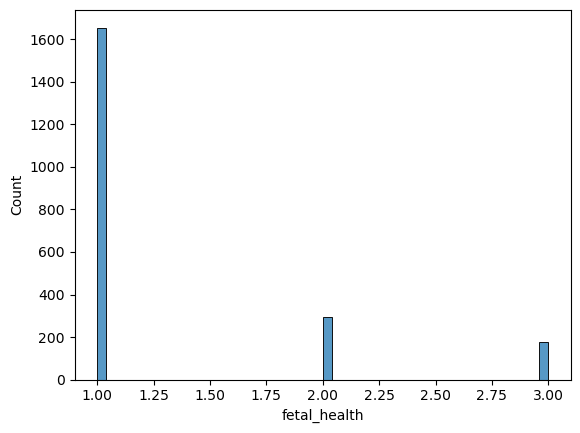

In [12]:
sns.histplot(data = fetal, x = "fetal_health", bins = 50)

<Axes: xlabel='fetal_health'>

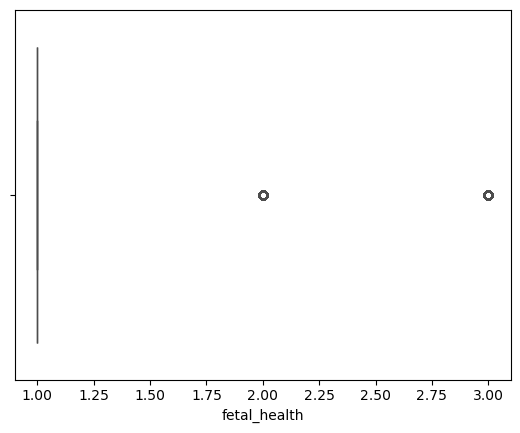

In [13]:
sns.boxplot(data = fetal, x = "fetal_health",color = "red")

<Axes: xlabel='fetal_health', ylabel='count'>

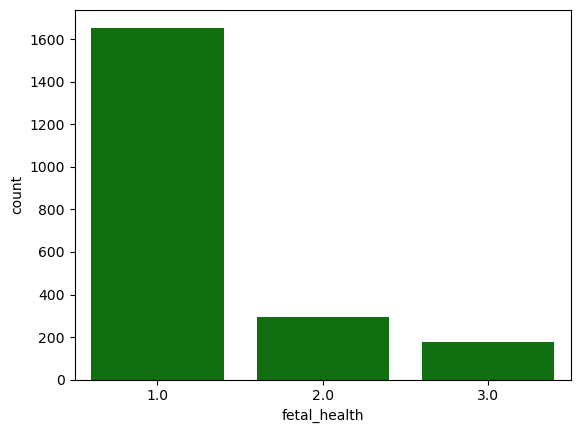

In [14]:
sns.countplot(data = fetal, x = "fetal_health", color = "green")

<Axes: xlabel='fetal_health'>

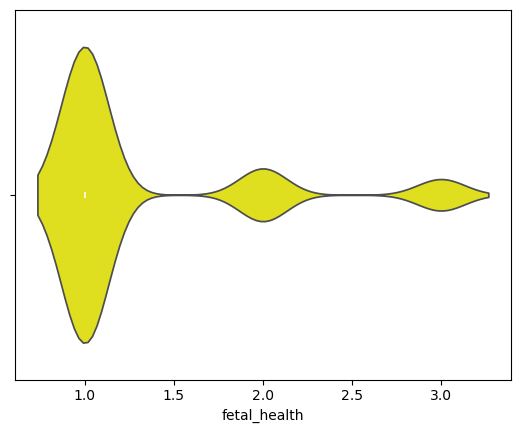

In [15]:
sns.violinplot(data = fetal, x = "fetal_health", color = "yellow")

<Axes: >

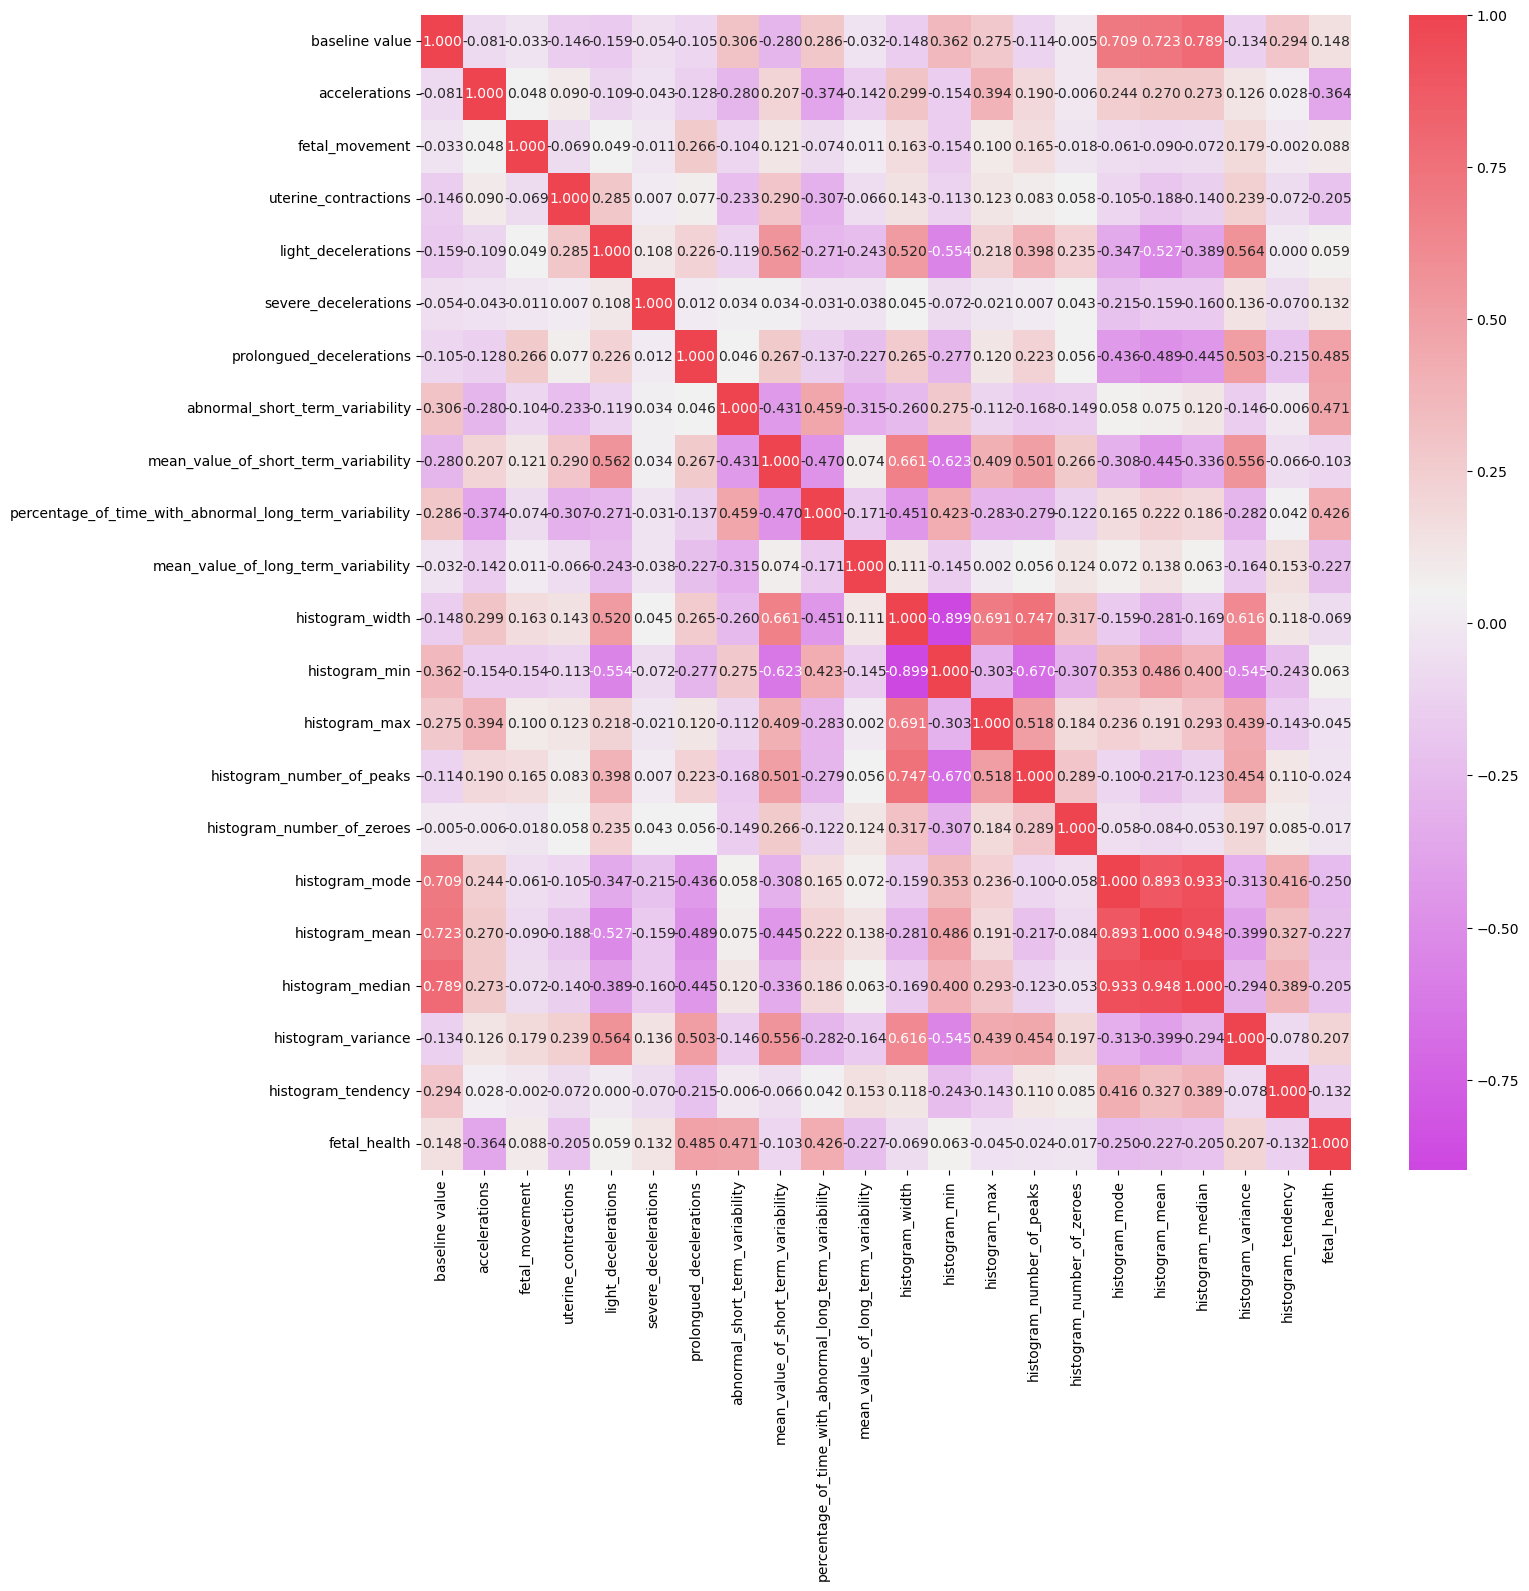

In [16]:
fig = plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(300, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(fetal.corr(), annot = True, fmt = '.3f', cmap = cmap)

In [17]:
fetal.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [18]:
seed = np.random.seed(42)
df_full_train, df_test = train_test_split(fetal, random_state = seed, test_size = 0.2)

In [19]:
df_train, df_val = train_test_split(df_full_train, random_state = seed, test_size = 0.25)

In [20]:
len(df_train), len(df_test), len(df_val)

(1275, 426, 425)

In [21]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [22]:
y_train = df_train.fetal_health.values
y_val = df_val.fetal_health.values
y_test = df_test.fetal_health.values

In [23]:
del df_train["fetal_health"]
del df_val["fetal_health"]
del df_test["fetal_health"]

In [24]:
df_train.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [25]:
df_val

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,146.0,0.000,0.000,0.006,0.000,0.0,0.0,39.0,0.8,38.0,...,18.0,148.0,166.0,1.0,0.0,154.0,155.0,156.0,1.0,0.0
1,130.0,0.014,0.084,0.001,0.000,0.0,0.0,34.0,2.1,0.0,...,132.0,50.0,182.0,10.0,0.0,159.0,150.0,155.0,26.0,1.0
2,148.0,0.000,0.000,0.005,0.000,0.0,0.0,49.0,0.6,1.0,...,21.0,143.0,164.0,0.0,0.0,155.0,154.0,156.0,0.0,0.0
3,126.0,0.001,0.000,0.005,0.000,0.0,0.0,34.0,0.9,3.0,...,41.0,110.0,151.0,2.0,0.0,126.0,128.0,129.0,4.0,0.0
4,127.0,0.009,0.005,0.000,0.000,0.0,0.0,35.0,1.2,0.0,...,120.0,62.0,182.0,6.0,0.0,133.0,139.0,135.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,130.0,0.007,0.001,0.005,0.000,0.0,0.0,69.0,0.7,5.0,...,46.0,112.0,158.0,4.0,0.0,139.0,139.0,140.0,3.0,0.0
421,132.0,0.000,0.000,0.007,0.001,0.0,0.0,47.0,0.7,1.0,...,31.0,114.0,145.0,1.0,0.0,136.0,134.0,136.0,2.0,1.0
422,130.0,0.002,0.000,0.006,0.000,0.0,0.0,47.0,0.7,30.0,...,39.0,114.0,153.0,4.0,0.0,137.0,136.0,138.0,2.0,0.0
423,133.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.3,78.0,...,8.0,131.0,139.0,1.0,0.0,134.0,134.0,135.0,0.0,0.0


In [26]:
df_test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,133.0,0.002,0.010,0.003,0.002,0.0,0.000,46.0,1.1,0.0,...,69.0,95.0,164.0,5.0,0.0,139.0,135.0,138.0,9.0,0.0
1,125.0,0.000,0.001,0.009,0.008,0.0,0.000,62.0,1.7,0.0,...,72.0,68.0,140.0,5.0,0.0,130.0,116.0,125.0,29.0,1.0
2,131.0,0.004,0.003,0.004,0.005,0.0,0.001,60.0,2.1,0.0,...,90.0,78.0,168.0,8.0,0.0,133.0,127.0,132.0,21.0,0.0
3,131.0,0.011,0.000,0.005,0.000,0.0,0.000,29.0,1.3,0.0,...,89.0,82.0,171.0,8.0,0.0,143.0,145.0,145.0,9.0,1.0
4,125.0,0.000,0.000,0.008,0.007,0.0,0.001,64.0,1.3,0.0,...,77.0,78.0,155.0,4.0,0.0,114.0,111.0,114.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,145.0,0.000,0.021,0.000,0.000,0.0,0.000,74.0,0.3,30.0,...,54.0,131.0,185.0,2.0,0.0,145.0,144.0,146.0,1.0,-1.0
422,131.0,0.000,0.000,0.005,0.008,0.0,0.000,32.0,1.8,6.0,...,97.0,59.0,156.0,3.0,1.0,135.0,120.0,133.0,70.0,1.0
423,144.0,0.006,0.005,0.002,0.000,0.0,0.000,33.0,1.7,0.0,...,103.0,71.0,174.0,5.0,1.0,150.0,149.0,151.0,10.0,1.0
424,136.0,0.000,0.003,0.008,0.001,0.0,0.000,67.0,2.2,0.0,...,45.0,100.0,145.0,3.0,0.0,133.0,131.0,136.0,2.0,1.0


In [27]:
df_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,122.0,0.004,0.000,0.006,0.006,0.0,0.0,21.0,1.7,0.0,...,69.0,74.0,143.0,4.0,0.0,133.0,121.0,126.0,32.0,1.0
1,106.0,0.000,0.000,0.009,0.000,0.0,0.0,64.0,0.6,0.0,...,20.0,102.0,122.0,1.0,0.0,111.0,111.0,112.0,0.0,0.0
2,135.0,0.007,0.000,0.005,0.000,0.0,0.0,58.0,0.8,0.0,...,50.0,121.0,171.0,2.0,0.0,148.0,146.0,147.0,8.0,0.0
3,122.0,0.000,0.000,0.006,0.009,0.0,0.0,18.0,1.9,0.0,...,44.0,91.0,135.0,4.0,0.0,126.0,117.0,121.0,19.0,1.0
4,136.0,0.000,0.000,0.009,0.000,0.0,0.0,78.0,0.4,27.0,...,43.0,112.0,155.0,4.0,0.0,138.0,137.0,139.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,136.0,0.009,0.008,0.000,0.000,0.0,0.0,46.0,1.3,0.0,...,149.0,51.0,200.0,12.0,0.0,144.0,145.0,147.0,8.0,0.0
1271,123.0,0.000,0.000,0.005,0.006,0.0,0.0,45.0,1.0,19.0,...,85.0,59.0,144.0,8.0,1.0,124.0,119.0,125.0,14.0,1.0
1272,138.0,0.001,0.000,0.003,0.000,0.0,0.0,40.0,0.8,7.0,...,49.0,105.0,154.0,5.0,0.0,142.0,141.0,143.0,1.0,1.0
1273,120.0,0.000,0.000,0.003,0.000,0.0,0.0,50.0,0.7,26.0,...,20.0,116.0,136.0,0.0,0.0,125.0,123.0,125.0,1.0,0.0


In [28]:
dv = DictVectorizer(sparse = False)
train_dict = df_train.fillna(0).to_dict(orient = "records")
x_train = dv.fit_transform(train_dict)
x_train

array([[2.10e+01, 4.00e-03, 1.22e+02, ..., 0.00e+00, 0.00e+00, 6.00e-03],
       [6.40e+01, 0.00e+00, 1.06e+02, ..., 0.00e+00, 0.00e+00, 9.00e-03],
       [5.80e+01, 7.00e-03, 1.35e+02, ..., 0.00e+00, 0.00e+00, 5.00e-03],
       ...,
       [4.00e+01, 1.00e-03, 1.38e+02, ..., 0.00e+00, 0.00e+00, 3.00e-03],
       [5.00e+01, 0.00e+00, 1.20e+02, ..., 0.00e+00, 0.00e+00, 3.00e-03],
       [5.80e+01, 0.00e+00, 1.41e+02, ..., 0.00e+00, 0.00e+00, 3.00e-03]])

In [29]:
val_dict = df_val.fillna(0).to_dict(orient = "records")
x_val = dv.transform(val_dict)

test_dict = df_test.fillna(0).to_dict(orient = "records")
x_test = dv.transform(test_dict)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_train)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [33]:
accuracy = accuracy_score(y_train,y_pred)
accuracy

0.9207843137254902

In [34]:
y_preds = model.predict(X_test)

In [35]:
accuracys = accuracy_score(y_test, y_preds)
accuracys

0.8732394366197183

In [38]:
dt = DecisionTreeClassifier(max_depth = 6, random_state = 42, min_samples_leaf = 3, max_features = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=4, min_samples_leaf=3,
                       random_state=42)

In [41]:
y_dt = dt.predict(X_test)


In [43]:
accuracy = accuracy_score(y_test, y_dt)
accuracy

0.92018779342723

In [45]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 6, min_samples_leaf = 5, verbose = False)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, n_estimators=10,
                       verbose=False)

In [47]:
y_rf = rf.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_rf)
accuracy

0.9225352112676056

In [ ]:
svc 